<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Simulate-Heartbeat" data-toc-modified-id="Simulate-Heartbeat-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Simulate Heartbeat</a></span></li><li><span><a href="#Tests-and-Plots" data-toc-modified-id="Tests-and-Plots-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Tests and Plots</a></span></li></ul></div>

In [57]:
# Basic libraries import
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib notebook

import os
import sys

import itertools
import collections

# project specific libraries
import scipy.signal as signal

%load_ext autoreload
%autoreload 2

import heartbeat_utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Simulate Heartbeat
[Source](http://stackoverflow.com/questions/4387878/simulator-of-realistic-ecg-signal-from-rr-data-for-matlab-or-python/33737898#33737898)

In [3]:
# The "Daubechies" wavelet is a rough approximation to a real,
# single, heart beat ("pqrst") signal
pqrst = signal.wavelets.daub(10)

In [8]:
# Add the gap after the pqrst when the heart is resting. 
samples_rest = 10
zero_array = np.zeros(samples_rest, dtype=float)
pqrst_full = np.concatenate([pqrst,zero_array])

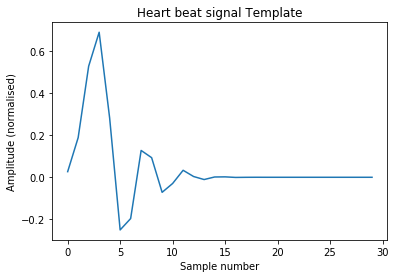

In [10]:
plt.plot(pqrst_full)
plt.xlabel('Sample number')
plt.ylabel('Amplitude (normalised)')
plt.title('Heart beat signal Template')
plt.show()

In [11]:
# Simulated Beats per minute rate
bpm = 60
bps = bpm / 60

# Simumated period of time in seconds that the ecg is captured in
capture_length = 10

# Caculate the number of beats in capture time period 
# Round the number to simplify things
num_heart_beats = int(capture_length * bps)

# Concatonate together the number of heart beats needed
ecg_template = np.tile(pqrst_full , num_heart_beats)

# Add random (gaussian distributed) noise 
noise = np.random.normal(0, 0.01, len(ecg_template))
ecg_template_noisy = noise + ecg_template

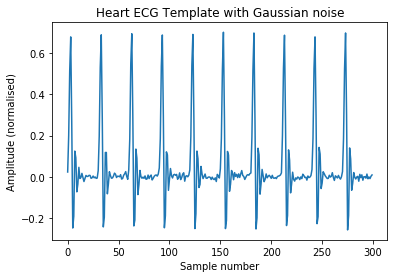

In [13]:
plt.plot(ecg_template_noisy)
plt.xlabel('Sample number')
plt.ylabel('Amplitude (normalised)')
plt.title('Heart ECG Template with Gaussian noise')
plt.show()

# Tests and Plots

In [82]:
bpm_series = [10, 70, 30, 65, 120, 160, 90, 10]

In [83]:
hb = heartbeat_utils.simulate_heartbeat(bpm_series)

<IPython.core.display.Javascript object>


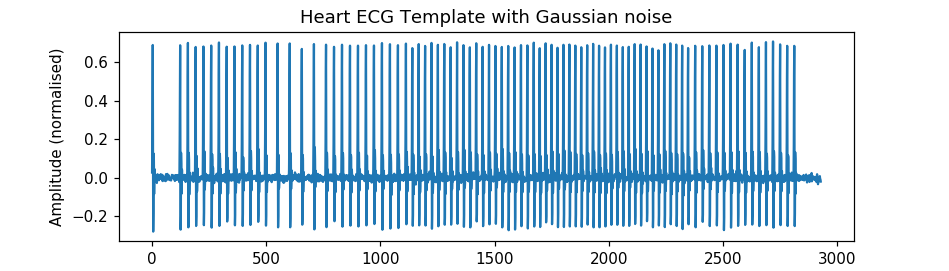

In [84]:
plt.plot(hb)
plt.xlabel('Sample number')
plt.ylabel('Amplitude (normalised)')
plt.title('Heart ECG Template with Gaussian noise')
plt.show()

<IPython.core.display.Javascript object>


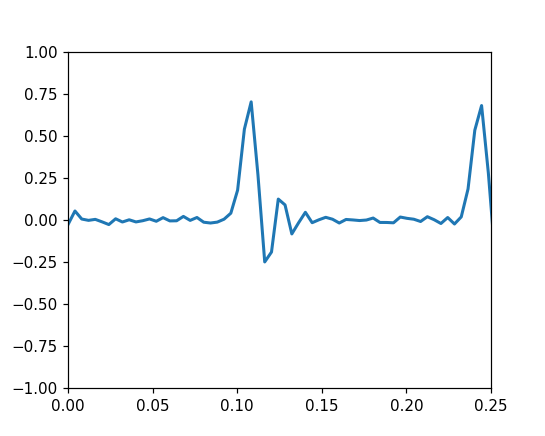

In [85]:
from matplotlib import animation

%matplotlib notebook

fig, ax = plt.subplots(dpi=100, figsize=(5, 4))
ax.set_xlim(0, 0.25)
ax.set_ylim(-1, 1)

line, = ax.plot([], [], lw=2)
#epoch_text = ax.text(0, 0, "Epoch 0")

def animate(i, line):
    x = np.linspace(0, 2, 500)
    y = hb[i:i+500]
    #epoch_text.set_text("Epoch {}".format(i, cost))
    line.set_data(x, y)
    return line

ani = animation.FuncAnimation(fig, animate, len(hb), interval=5, repeat=True,
                             fargs=[line])